In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
inception_v2 = tf.keras.applications.InceptionResNetV2(
    weights='imagenet',
    include_top = False
)

In [ ]:
inception_v2.summary()

In [4]:
from keras.utils import plot_model

In [ ]:
plot_model(inception_v2)

In [3]:
img_path = "/content/Capture.jpg"

In [4]:
def load_img(img_path):
  img = tf.io.read_file(img_path) # read file from disk
  img= tf.io.decode_jpeg(img, channels=3) # load as tensor
  img = tf.keras.layers.Resizing(299, 299) (img) # resize
  img = img / 255. # normalize
  return img

In [5]:
def get_feature_vector(img_path):
  img = load_img(img_path)
  img = tf.expand_dims (img, axis=0) # batch axis
  feature_vector = inception_v2(img) # yeah, that's it!
  return img, feature_vector

In [9]:
img, feature_vector = get_feature_vector(img_path)

(-0.5, 298.5, 298.5, -0.5)

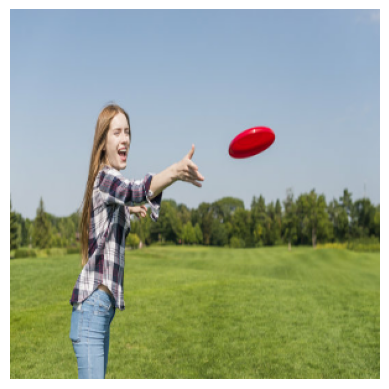

In [10]:
plt.imshow(np.squeeze(img, axis=0))
plt.axis('off')

In [11]:
print('Input image size :', img.shape)
print('Feature vector size :', feature_vector.shape)

Input image size : (1, 299, 299, 3)
Feature vector size : (1, 8, 8, 1536)
